# Regression

## Setup

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

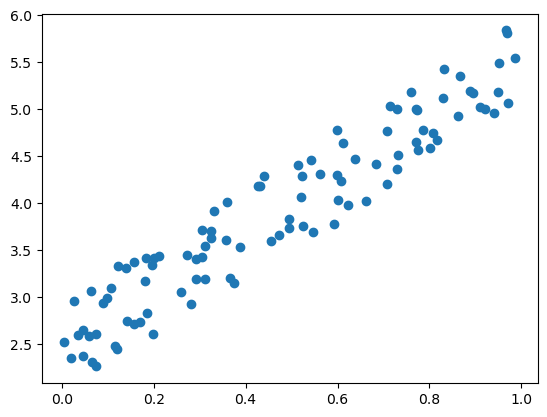

In [174]:
# Random seed for noise
np.random.seed(42)
# No. of data
m = 100
X = 1 * np.random.rand(m, 1)
# 2 + 3X with gausian noise
y = 2 + 3 * X + np.random.rand(m, 1)

fig, ax = plt.subplots()
ax.scatter(X, y)

## Model

The most basic form of regression model is a linear equation.

for 1 parameter

$ f_{w, b}(x^{(i)}) = wx^{(i)} + b $

for multiple parameters

$ f_{w, b}(x^{(i)}) = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b $

or in vectorized form

$ f_{w, b}(x^{(i)}) = X^T w + b $

- $f_{w, b}(x^{(i)})$ : hypothesis function
- $X$ : features
- $w$ : weight
- $b$ : bias unit

In [175]:
# Every X features multiply with w weights and add bias unit b
def pred(X, params):
    return X @ params

In [176]:
from sklearn.preprocessing import add_dummy_feature

# X plot with x axis min and max for plot prediction line.
X_plot = np.array([[0], [1]])
# Add dummy feature for initiate bias unit.
X_plot_b = add_dummy_feature(X_plot)

params = np.array([2, 4])
y_pred = pred(X_plot_b, params)
y_pred

array([2., 6.])

Let's plot the linear function to see if it fits the samples well.

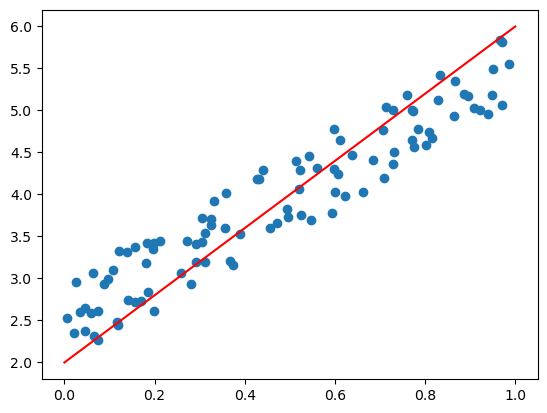

In [177]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_plot, y_pred, c='r', label='Prediction')

Apperently it is not fit well. But how bad performance it is? Let's calculate **Error Function**

### Error Function (Cost Function)

When we fit (or train) the models we need error function to measure how well the model fit to the data. We use

**Mean square error**

Basicly it is a squared of sum of diffrent between predicted values and true values

$ J(w, b) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} \Big(f_{w, b}(x^{(i)}) - y^{(i)} \Big)^2 $

In [178]:
def cost_func(model, X, y, params):
    y_pred = pred(X, params)
    return (np.sum((y_pred - y)**2)) / 2 * len(y)

In [179]:
X_b = add_dummy_feature(X)

cost_func(pred, X_b, y, params)

1129283.077681923

### Training the model

We what to minimize $J_(w,b)$ automatically. We can do that 2 ways 
1. Normal Equation
2. Gradient Descent

but how to choose one?

| Gradient Descent | Normal Equation |
| :---| :---|
| We need to choose the algorithm.  |	No need.
| Iterative algorithm.              |   Analytical approach.
| Larger number of features. <br> Algorithm complexity is O(n^2). | Smaller number of features. <br> Algorithm complexity is O(n^3). 
| Feature scaling can be used.	    | No need for feature scaling.
| No need to handle non-invertibility case.	| Rgularization can be used to handle this.

#### 1. Normal Equation

$ (X^{T} X)^{-1}(X^{T}y) $

In [180]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [181]:
# Compute normal_equation
params = normal_equation(X_b, y)
b_ne, w_ne  = params
print(f'The best w is {w_ne} and b is {b_ne}')

The best w is [2.96646836] and b is [2.51359766]


In [182]:
y_pred = pred(X_b, params)

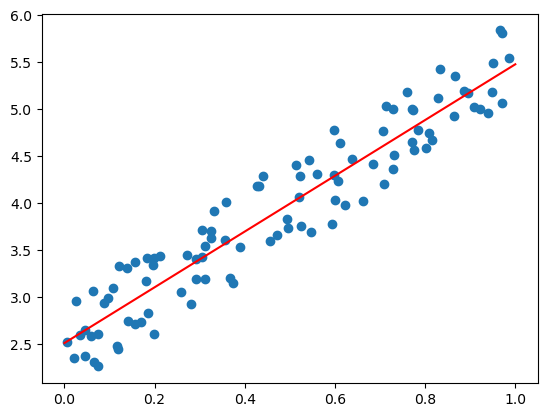

In [183]:
y_pred = pred(X_plot_b, params)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_plot, y_pred, c='r')

Vola! It fits perfectly.

In [184]:
cost_func(pred, X_b, y, params)

424.782762829687

424 is way better than 3,790

#### 2. Batch Gradient Descent

The square in MSE equation made the graph convex function (Like a bowl), means there is only one global minimum.

To do that we need to create a tangent line, and the slope of tangent line is 0 at minimum, -v at left, +v at right of the minimum. To do that we use partial derivertive.

We use this value to iteratively update $w$ this function called **gradient descent**.

$ b := b - \alpha \frac{\delta}{\delta b} J(w,b) $ \
$ w^{(i)} := w^{(i)} - \alpha \frac{\delta}{\delta w} J(w,b) * x^{(i)} $

$ J(w, b) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} \Big(f_{w, b}(x^{(i)}) - y^{(i)} \Big)^2 $

solve the derivative

$ w^{(i)} := w^{(i)} - \alpha \frac{1}{m} \displaystyle\sum_{i=1}^{m} \Big(f_{w, b}(x^{(i)}) - y^{(i)} \Big) * x^{(i)} $

In [216]:
l_rate = 0.3
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
params = np.random.randn(2, 1)

costs = []
epoch_result = []

for epoch in range(n_epochs):
    y_pred = pred(X_b, params)
    cost = cost_func(pred, X_b, y, params)
    gradients = X_b.T @ (y_pred - y) / m
    params = params - l_rate * gradients
    
    costs.append(cost)
    epoch_result.append(params)
    
b_gd, w_gd = params

In [217]:
cost_func(pred, X_b, y, params)

424.78276282968704

Exercise: Plot **Cost Function** to analyse the model

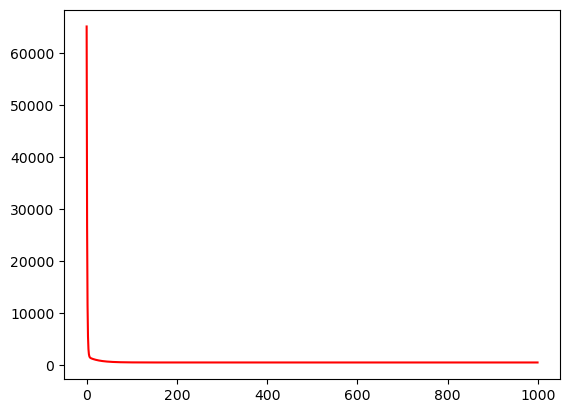

In [187]:
fig2, ax2 = plt.subplots()

ax2.plot([i for i in range(n_epochs)], costs, c='r')

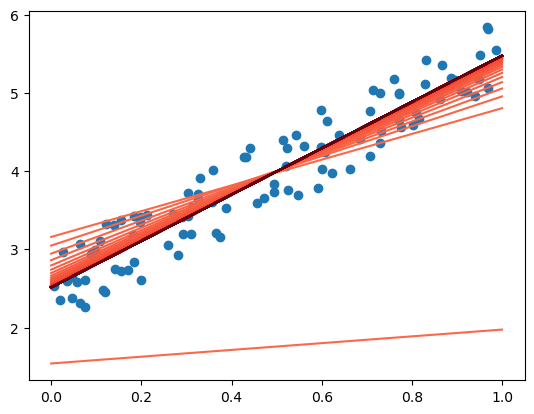

In [188]:
from matplotlib.pyplot import cm

n_lines = 100
step = n_epochs // n_line

fig, ax = plt.subplots()
ax.scatter(X, y)
color = iter(cm.Reds(np.linspace(0.5, 1, n_line)))

for params in epoch_result[::step]:
    y_pred = pred(X_plot_b, params)
    c = next(color)
    ax.plot(X_plot, y_pred, c=c)

In [189]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

print(f'Normal Equation: The best w is {w_ne} and b is {b_ne}')
print(f'Gradient Descent: The best w is {w_gd} and b is {b_gd}')
print(f'Sklearn: The best w is {lin_reg.coef_} and b is {lin_reg.intercept_}')

Normal Equation: The best w is [2.96646836] and b is [2.51359766]
Gradient Descent: The best w is [2.96646836] and b is [2.51359766]
Sklearn: The best w is [[2.96646836]] and b is [2.51359766]


We did it! We've just implement the linear regression from scratch correctly.

But all of the method require to calculate the whole dataset, if the data is large this would be SLOW or USE UP ALL MEMORY SPACE.

#### 3. Stocasctic Gradient Descent

Took different approch by select random instance in the traning set at every step and compute the gradient base on that instance only.

Randomness makes the algorithm faster, helps escape the local minima, but the final parameters might not settle (not optimal).

The solution of this problem is to start with large learning rate then gradually reduce it.

In [228]:
n_epochs = 50
t0, t1 = 5, 50

params = np.random.randn(2, 1)

# Learning rate schedule algorithm makes learning rate dynamic.
def learning_schedule(t):
    # t = epoch * m + iteration
    # means later epoch, finer learning rate.
    return t0 / (t + t1)

costs = []
epoch_result = []

for epoch in range(n_epochs):
    # each epoch, random sample instances m times
    for iteration in range(m):
        # Shuffle the data at each epoch
        random_index = np.random.randint(m)
        Xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        # Gradient Descent for just only 1 random instant
        y_pred = pred(Xi, params)
        cost = cost_func(pred, X_b, y, params)
        gradients = Xi.T @ (y_pred - yi) # Do not divide by m. (Because we have only a data)
        l_rate = learning_schedule(epoch * m + iteration)
        params = params - l_rate * gradients
        
    costs.append(cost)
    epoch_result.append(params)
    

b_sgd, w_sgd = params

In [229]:
print(f'The last cost is {cost_func(pred, X_b, y, params)}, The best cost is {min(costs)}')

The last cost is 426.0548250281432, The best cost is 426.06668903896906


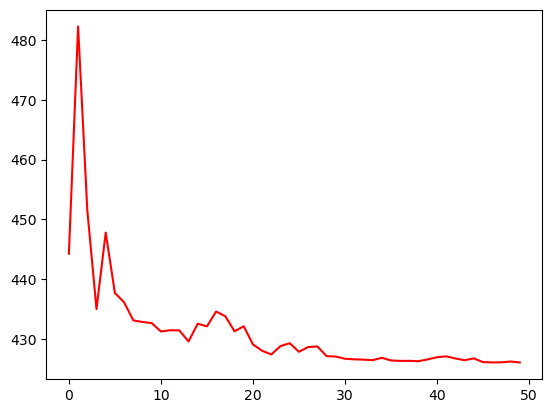

In [230]:
fig2, ax2 = plt.subplots()

ax2.plot([i for i in range(n_epochs)], costs, c='r')

The randomness makes it fluctuated but reaching minimal.

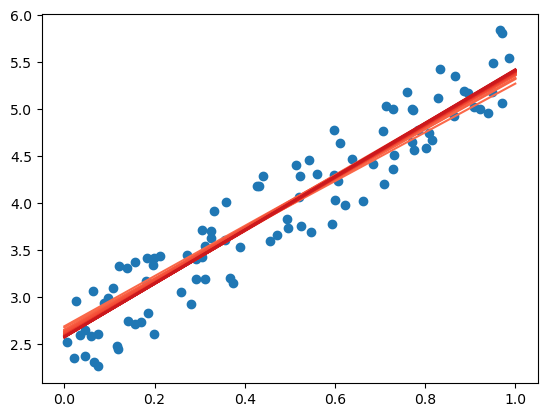

In [202]:
n_lines = len(epoch_result)
step = 1

fig, ax = plt.subplots()
ax.scatter(X, y)
color = iter(cm.Reds(np.linspace(0.5, 1, n_line)))

for params in epoch_result[::step]:
    y_pred = pred(X_plot_b, params)
    c = next(color)
    ax.plot(X_plot, y_pred, c=c)

Let's use Sklearn

In [237]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets
y_pred = sgd_reg.predict(y)

In [239]:
cost_func(pred, X_b, y, (sgd_reg.intercept_, sgd_reg.coef_))

427.5897519238288

In [240]:
print(f'Sklearn: The best w is {sgd_reg.coef_} and b is {sgd_reg.intercept_}')

Sklearn: The best w is [2.88691744] and b is [2.55363532]


#### Polynomial

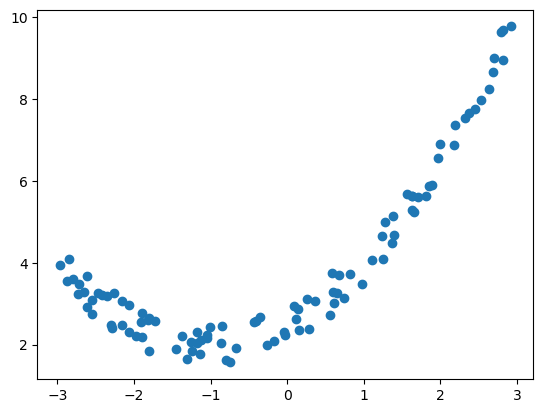

In [251]:
# Random seed for noise
np.random.seed(42)
# No. of data
m = 100
X = 6 * np.random.rand(m, 1) - 3
# 2 + 3X with gausian noise
y = (0.5 * X ** 2) + X + 2 + np.random.rand(m, 1)

fig, ax = plt.subplots()
ax.scatter(X, y)